<a href="https://colab.research.google.com/github/Cheetah-lhp/MachineLearning/blob/main/So_s%C3%A1nh_Kmeans%2C_DBSCAN%2C_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def generate_ring_data(num_rings, points_per_ring, radius_increment, noise_level = 0.1):
    X = []
    for i in range(num_rings):
      radius = (i+1)*radius_increment
      angles = np.linspace(0, 2 * np.pi, points_per_ring, endpoint=False)
      x_ring = radius * np.cos(angles) + np.random.normal(0, noise_level, points_per_ring)
      y_ring = radius * np.sin(angles) + np.random.normal(0, noise_level, points_per_ring)
      X.extend(list(zip(x_ring, y_ring)))
    return np.array(X)


num_rings = 4
points_per_ring = 200
radius_increment = 1.5
noise_level = 0.1
epsilon = 0.6
minPts = 4


X = generate_ring_data(num_rings, points_per_ring, radius_increment)

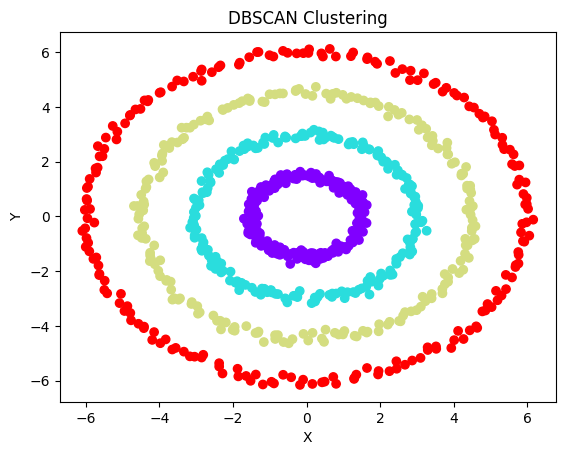

In [10]:
db = DBSCAN(eps=epsilon, min_samples=minPts).fit(X)
dblabels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=dblabels, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.show()

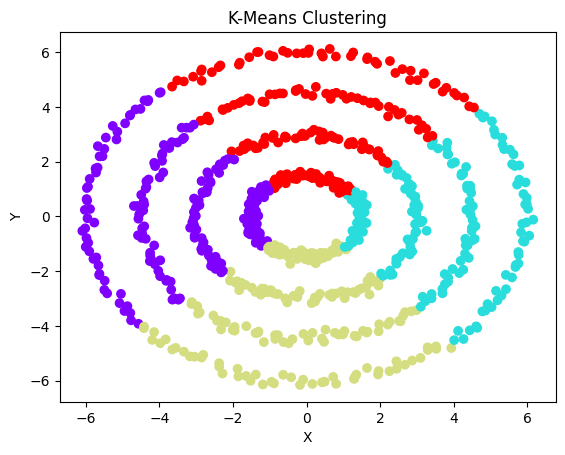

ARI_kmeans: -0.003541712211923438


In [11]:
knn = KMeans(4).fit(X)
knnlabels = knn.labels_
plt.scatter(X[:, 0], X[:, 1], c=knn.labels_, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.show()
ari = adjusted_rand_score(dblabels, knnlabels) #dblabels duoc coi nhu ground truth
print("ARI_kmeans:", ari)

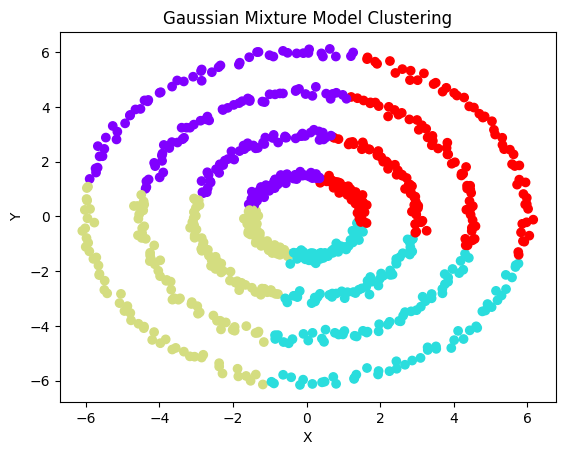

ARI_GMM: -0.0030529459193588612


In [12]:
gmm = GaussianMixture(n_components=4).fit(X)
gmmlabels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model Clustering')
plt.show()
ari = adjusted_rand_score(dblabels, gmmlabels) #dblabels duoc coi nhu ground truth
print("ARI_GMM:", ari)